In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import importlib
import os
import pickle
import glob

In [2]:
from multi_loc import covariance, assimilate, utilities

In [3]:
%matplotlib inline
def imshow(X, title=None, vmin=None, vmax=None, cmap=None, dpi=None):
    plt.figure(dpi=dpi)
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [4]:
tune_type = 'tune_hetero'

save_loc = '/Users/harty/Documents/python_code/multi_loc/notebooks/sampling_trials'
save_loc = os.path.join(save_loc, tune_type)

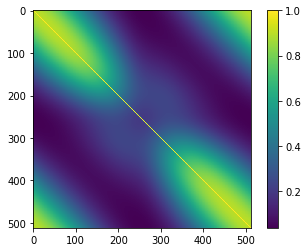

In [5]:
this_path = os.path.join(save_loc, 'Pz.npy')
Pz = np.load(this_path)
imshow(Pz)

In [6]:
search_path = os.path.join(save_loc, 'trial_*')
trial_dirs = glob.glob(search_path)
num_of_trials = len(trial_dirs)

this_path = os.path.join(trial_dirs[0], 'alpha_array.npy')
this_alpha_array = np.load(this_path)
alpha_range_size, rho0_range_size = this_alpha_array.shape

this_path = os.path.join(save_loc, 'smooth_array.npy')
smooth_array = np.load(this_path)

rmse_stdrd = np.ones([num_of_trials, alpha_range_size, rho0_range_size]) * np.nan
std_stdrd = rmse_stdrd.copy()
alpha_array = rmse_stdrd.copy()
rho0_array = rmse_stdrd.copy()

rmse_eig = rmse_stdrd.copy()
std_eig = rmse_stdrd.copy()

rmse_smooth = smooth_array * np.nan
std_smooth = rmse_smooth.copy()

rmse_Pz = np.ones([num_of_trials]) * np.nan
std_Pz = rmse_Pz.copy()
rmse_Qz = rmse_Pz.copy()
std_Qz = rmse_Pz.copy()
rmse_sam = rmse_Pz.copy()
std_sam = rmse_Pz.copy()

for trial_count in range(num_of_trials):
    print(f'trial_{trial_count:04}')
    trial_dir = os.path.join(save_loc, f'trial_{trial_count:04}')
    
    this_path = os.path.join(trial_dir, 'rmse_stdrd.npy')
    rmse_stdrd[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'std_stdrd.npy')
    std_stdrd[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rmse_eig.npy')
    rmse_eig[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'std_eig.npy')
    std_eig[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'alpha_array.npy')
    alpha_array[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rho0_array.npy')
    rho0_array[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rmse_Pz.npy')
    rmse_Pz[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'std_Pz.npy')
    std_Pz[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rmse_Qz.npy')
    rmse_Qz[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'std_Qz.npy')
    std_Qz[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rmse_sam.npy')
    rmse_sam[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'std_sam.npy')
    std_sam[trial_count] = np.load(this_path)
    
    this_path = os.path.join(trial_dir, 'rmse_smooth.npy')
    rmse_smooth[trial_count] = np.load(this_path) 
    
    this_path = os.path.join(trial_dir, 'std_smooth.npy')
    std_smooth[trial_count] = np.load(this_path)

trial_0000
trial_0001
trial_0002
trial_0003
trial_0004
trial_0005
trial_0006
trial_0007
trial_0008
trial_0009
trial_0010
trial_0011
trial_0012
trial_0013
trial_0014
trial_0015
trial_0016
trial_0017
trial_0018
trial_0019
trial_0020
trial_0021
trial_0022
trial_0023
trial_0024
trial_0025
trial_0026
trial_0027
trial_0028
trial_0029
trial_0030
trial_0031
trial_0032
trial_0033
trial_0034
trial_0035
trial_0036
trial_0037
trial_0038
trial_0039
trial_0040
trial_0041
trial_0042
trial_0043
trial_0044
trial_0045
trial_0046
trial_0047
trial_0048
trial_0049
trial_0050
trial_0051
trial_0052
trial_0053
trial_0054
trial_0055
trial_0056
trial_0057
trial_0058
trial_0059
trial_0060
trial_0061
trial_0062
trial_0063
trial_0064
trial_0065
trial_0066
trial_0067
trial_0068
trial_0069
trial_0070
trial_0071
trial_0072
trial_0073
trial_0074
trial_0075
trial_0076
trial_0077
trial_0078
trial_0079
trial_0080
trial_0081
trial_0082
trial_0083
trial_0084
trial_0085
trial_0086
trial_0087
trial_0088
trial_0089
trial_0090

In [7]:
ratio_stdrd = rmse_stdrd/std_stdrd
ave_rmse_stdrd = np.sqrt((rmse_stdrd**2).mean(axis=0))
ave_std_stdrd = np.sqrt((std_stdrd**2).mean(axis=0))
ave_ratio_stdrd = np.sqrt((ratio_stdrd**2).mean(axis=0))

min_index = np.unravel_index(np.argmin(ave_rmse_stdrd), (ave_rmse_stdrd.shape))
print('optimal values for standard localization')
print('rmse: ', ave_rmse_stdrd[min_index])
print('rho0: ', rho0_array[0][min_index])
print('alpha: ', alpha_array[0][min_index])

optimal values for standard localization
rmse:  0.13934156591770894
rho0:  0.063
alpha:  0.0


Text(0.5, 1.0, 'alpha vs rmse')

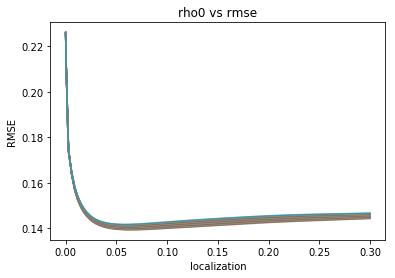

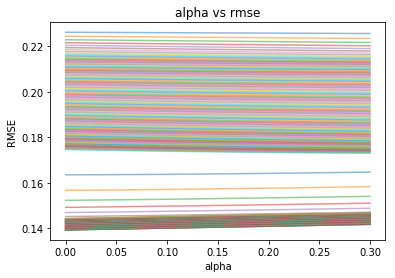

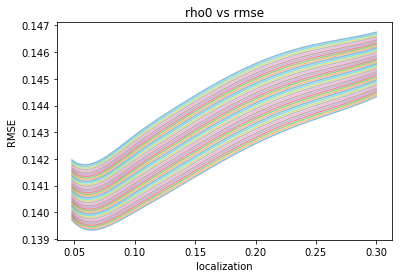

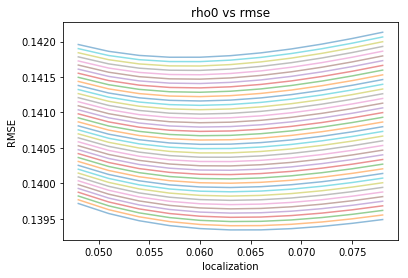

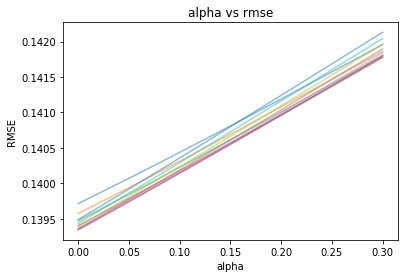

In [8]:
min_loc_index = min_index[1] - 5
plt.figure()
plt.plot(rho0_array[0, 0, :], ave_rmse_stdrd.T,
         alpha=0.5)
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure()
plt.plot(alpha_array[0, :, 0],
         ave_rmse_stdrd, 
         alpha=0.5)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('alpha vs rmse')


plt.figure()
plt.plot(rho0_array[0, 0, min_loc_index:],
         ave_rmse_stdrd[:, min_loc_index:].T,
         alpha=0.5)
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure()
plt.plot(rho0_array[0, 0, min_index[1] - 5:min_index[1] + 6],
         ave_rmse_stdrd[:, min_index[1] - 5:min_index[1] + 6].T,
         alpha=0.5)
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure()
plt.plot(alpha_array[0, :, 0],
         ave_rmse_stdrd[:, min_index[1] - 5:min_index[1] + 6], 
         alpha=0.5)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('alpha vs rmse')

Text(0.5, 1.0, 'rho0 vs rmse')

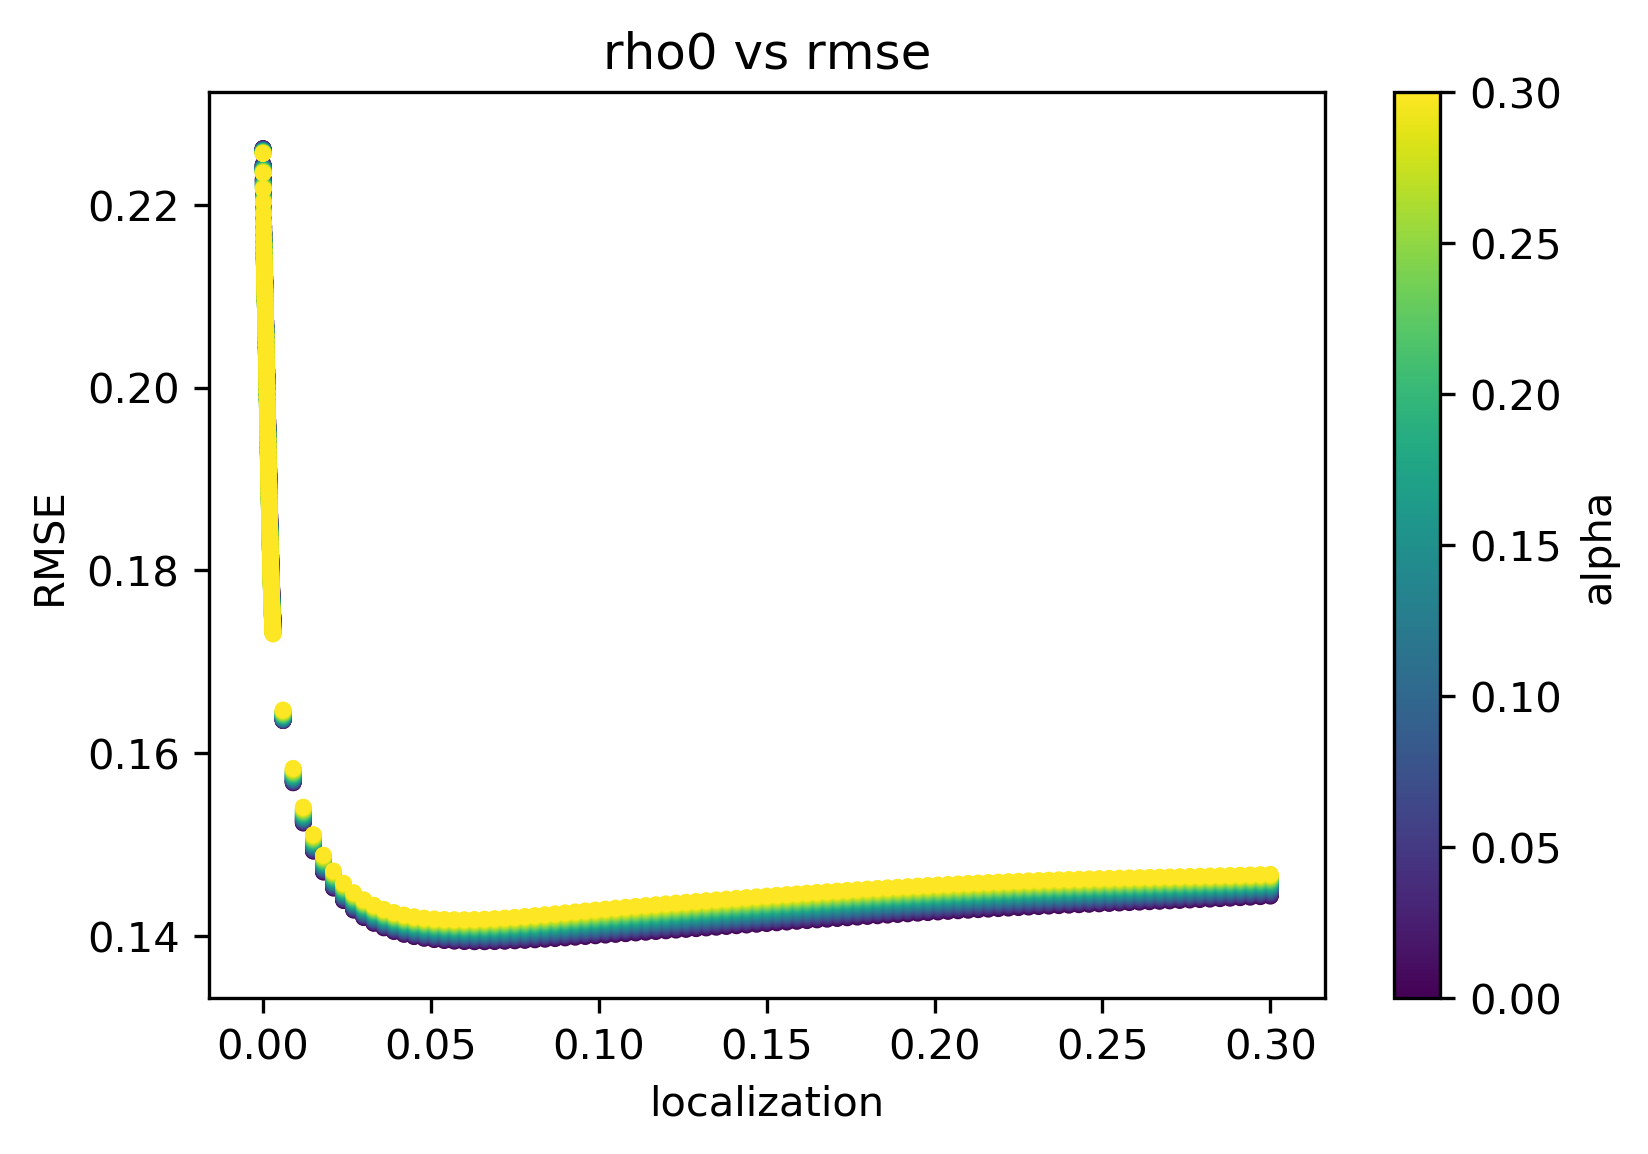

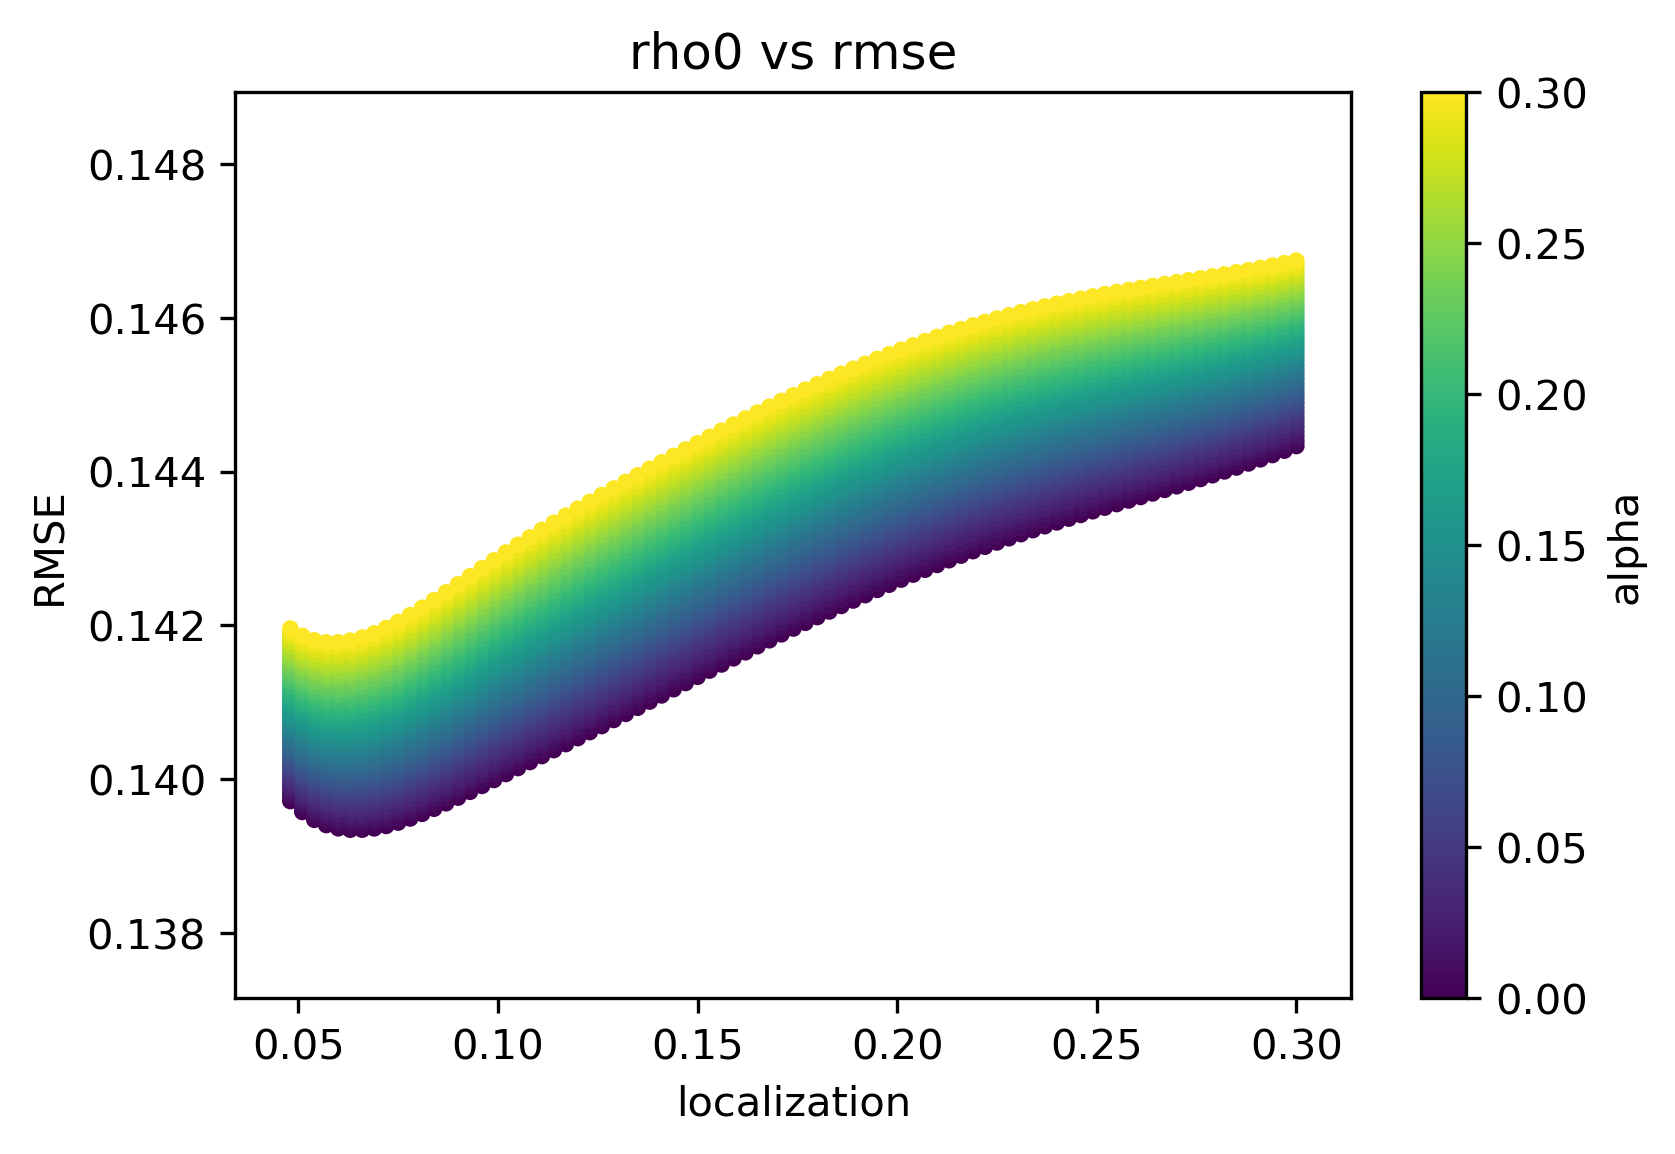

In [9]:
plt.figure(dpi=300)
im = plt.scatter(rho0_array[0],
                 ave_rmse_stdrd, 
                 c=alpha_array[0], 
                 alpha=1, marker='.')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('alpha')
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure(dpi=300)
im = plt.scatter(rho0_array[0, :, min_loc_index:],
                 ave_rmse_stdrd[:, min_loc_index:],
                 c=alpha_array[0, :, min_loc_index:],
                 alpha=1, marker='.')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('alpha')
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

Text(0.5, 1.0, 'rho0 vs rmse w/ ave optimum')

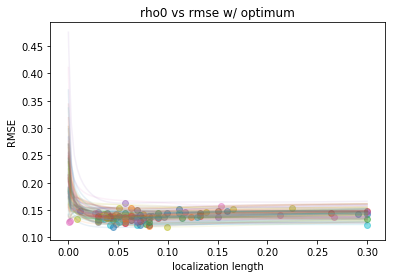

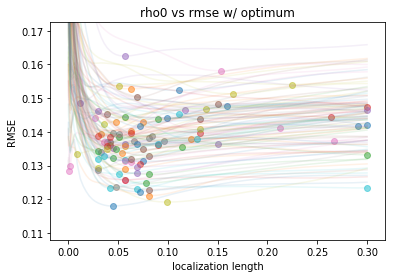

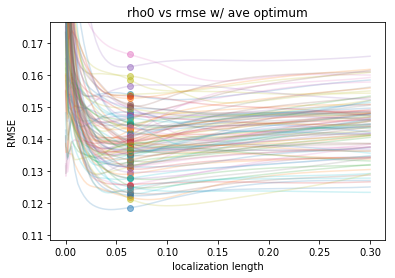

In [10]:
plt.figure()
for this_rmse in rmse_stdrd[:, 0, :]:
    this_arg_min = np.argmin(this_rmse)
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.1)
    plt.scatter(rho0_array[0, 0, this_arg_min],
                this_rmse[this_arg_min],
                alpha=0.5)
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse w/ optimum')

ymax = 0
ymin = 1
plt.figure()
for this_rmse in rmse_stdrd[:, 0, :]:
    this_arg_min = np.argmin(this_rmse)
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.1)
    plt.scatter(rho0_array[0, 0, this_arg_min],
                this_rmse[this_arg_min],
                alpha=0.5)
    ymin = np.min([ymin, this_rmse[this_arg_min]])
    ymax = np.max([ymax, this_rmse[this_arg_min]])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([ymin - 0.01, ymax + 0.01])
plt.title('rho0 vs rmse w/ optimum')

ymax = 0
ymin = 1
plt.figure()
for this_rmse in rmse_stdrd[:, 0, :]:
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.2)
    plt.scatter(rho0_array[0, 0, min_index[1]],
                this_rmse[min_index[1]],
                alpha=0.5)
    ymin = np.min([ymin, this_rmse[min_index[1]]])
    ymax = np.max([ymax, this_rmse[min_index[1]]])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([ymin - 0.01, ymax + 0.01])
plt.title('rho0 vs rmse w/ ave optimum')

In [11]:
ratio_eig = rmse_eig/std_eig
ave_rmse_eig = np.sqrt((rmse_eig**2).mean(axis=0))
ave_std_eig = np.sqrt((std_eig**2).mean(axis=0))
ave_ratio_eig = np.sqrt((ratio_eig**2).mean(axis=0))

min_index_eig = np.unravel_index(np.argmin(ave_rmse_eig), (ave_rmse_eig.shape))
print('optimal values for eig localization')
print('rmse: ', ave_rmse_eig[min_index_eig])
print('rho0: ', rho0_array[0][min_index_eig])
print('alpha: ', alpha_array[0][min_index_eig])

optimal values for eig localization
rmse:  0.12671134615948593
rho0:  0.003
alpha:  0.1575


Text(0.5, 1.0, 'alpha vs rmse')

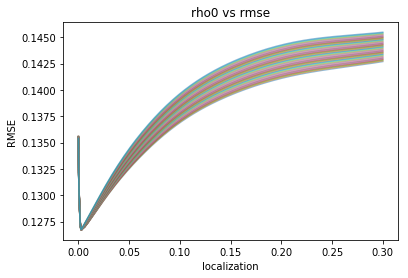

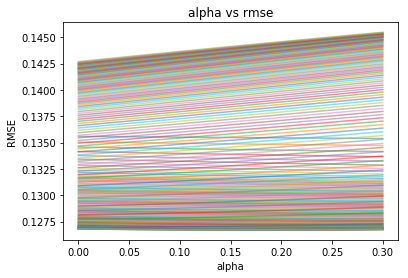

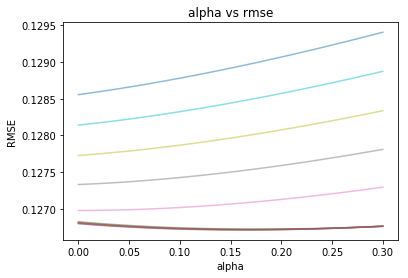

In [12]:
plt.figure()
plt.plot(rho0_array[0, 0, :], ave_rmse_eig.T,
         alpha=0.5)
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure()
plt.plot(alpha_array[0, :, 0],
         ave_rmse_eig, 
         alpha=0.5)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('alpha vs rmse')


# plt.figure()
# plt.plot(rho0_array[0, 0, min_index_eig[1] - 5:min_index_eig[1] + 1],
#          ave_rmse_eig[:, min_index_eig[1] - 5:min_index_eig[1] + 1].T,
#          alpha=0.5)
# plt.xlabel('localization')
# plt.ylabel('RMSE')
# plt.title('rho0 vs rmse')

plt.figure()
plt.plot(alpha_array[0, :, 0],
         ave_rmse_eig[:, min_index_eig[1] - 5:min_index_eig[1] + 6], 
         alpha=0.5)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('alpha vs rmse')

(0.12395206751173223, 0.15)

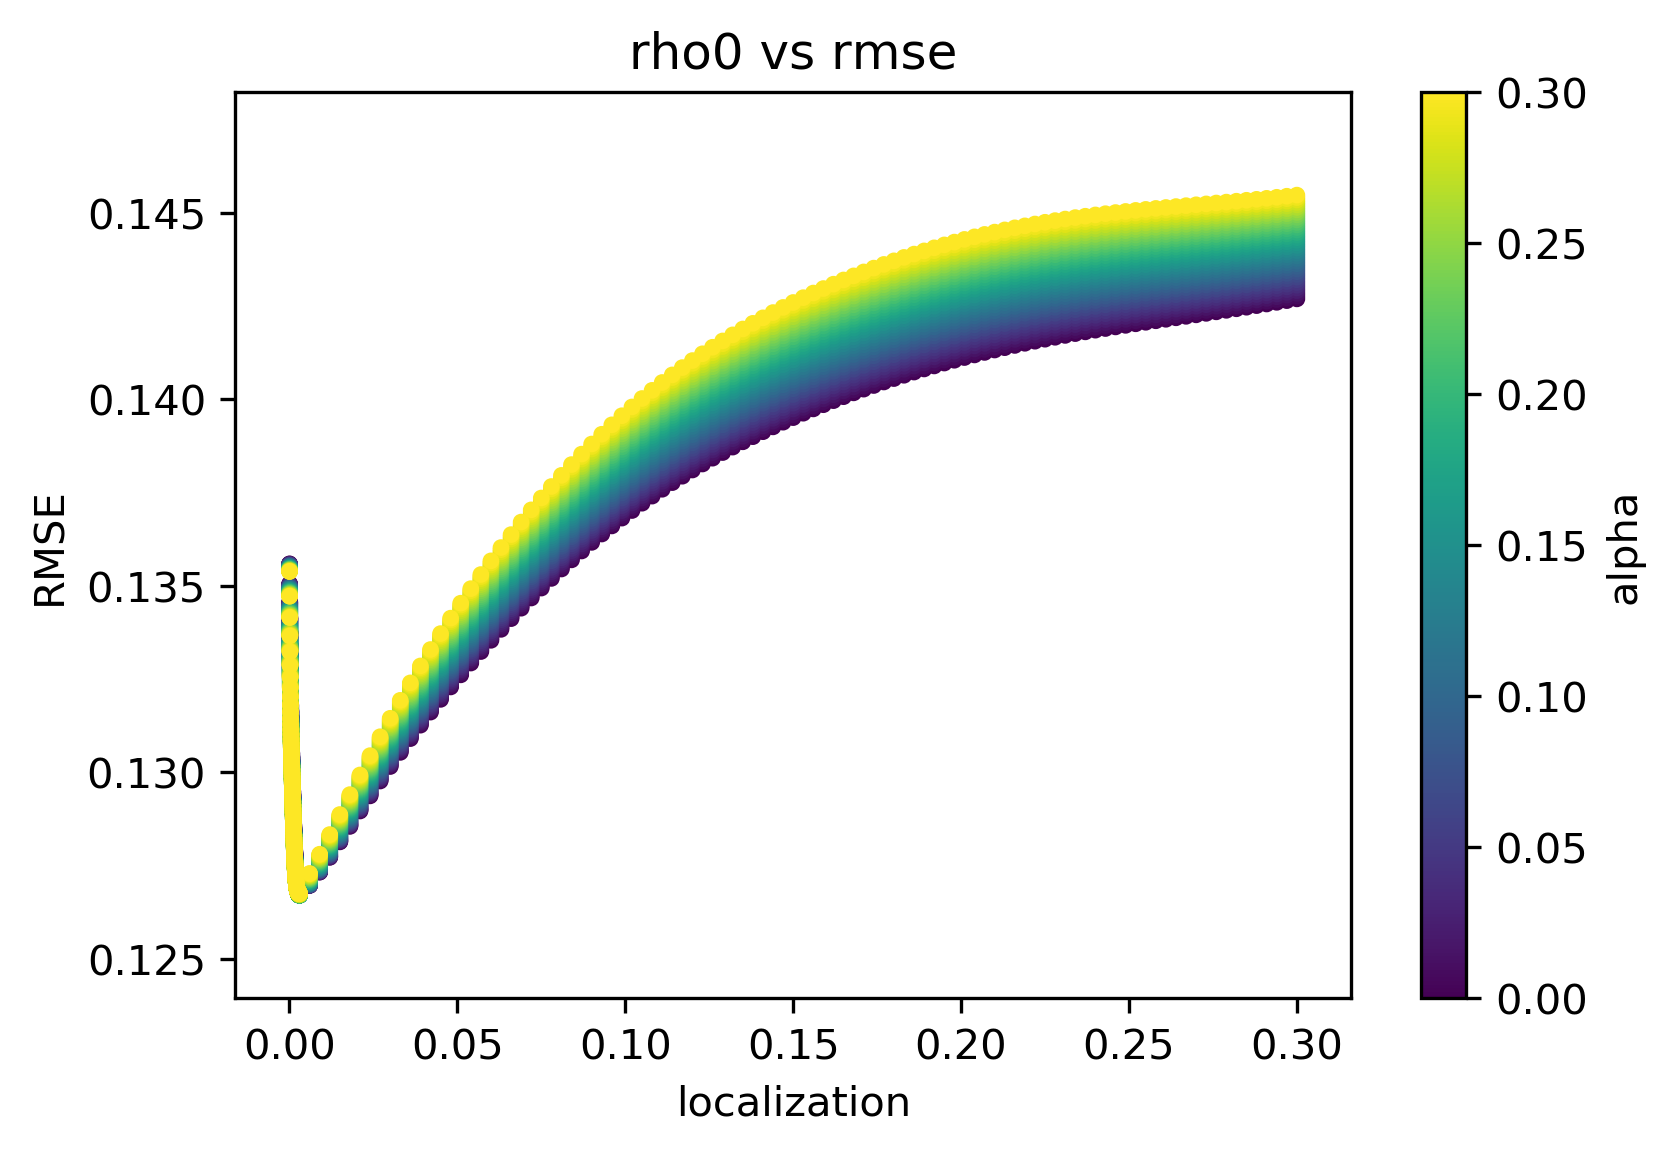

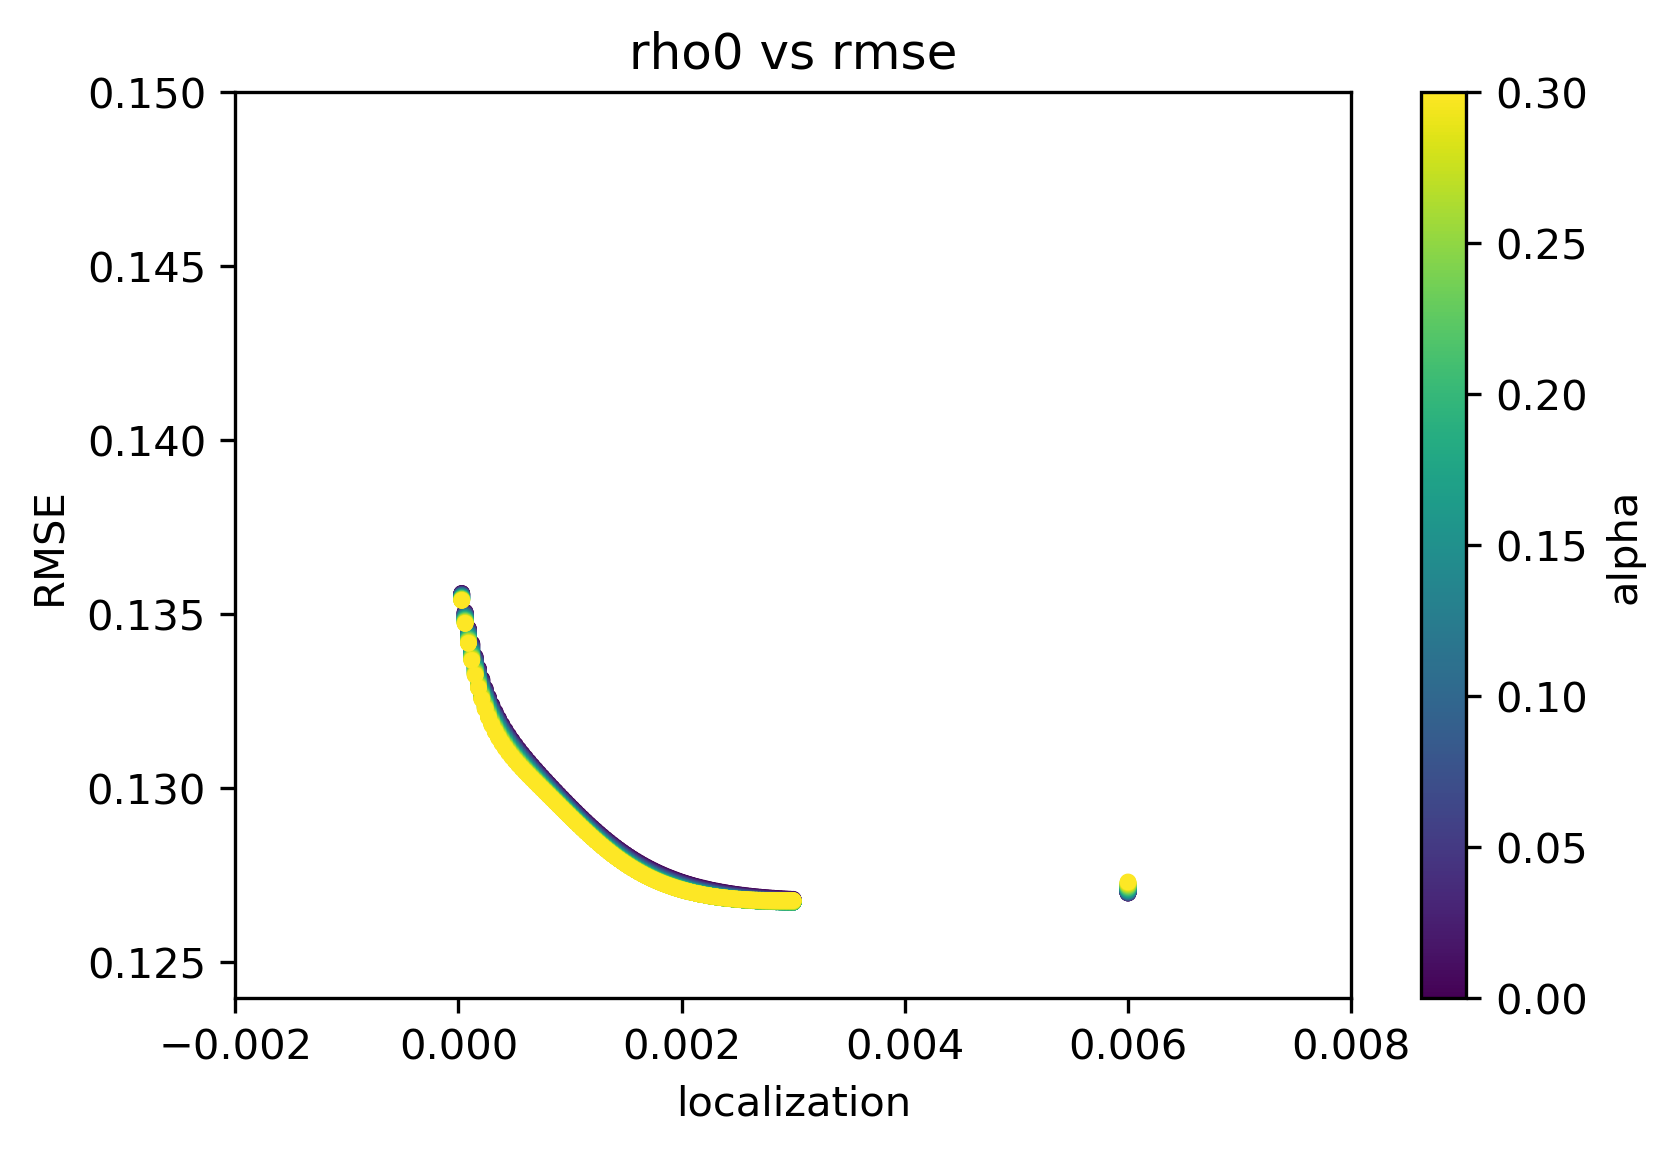

In [13]:
plt.figure(dpi=300)
im = plt.scatter(rho0_array[0],
                 ave_rmse_eig, 
                 c=alpha_array[0], 
                 alpha=1, marker='.')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('alpha')
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')

plt.figure(dpi=300)
im = plt.scatter(rho0_array[0],
                 ave_rmse_eig, 
                 c=alpha_array[0], 
                 alpha=1, marker='.')
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('alpha')
plt.xlabel('localization')
plt.ylabel('RMSE')
plt.title('rho0 vs rmse')
plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
          rho0_array[0, 0, min_index_eig[1]] + .005])
plt.ylim([None, 0.15])


(-0.002, 0.068)

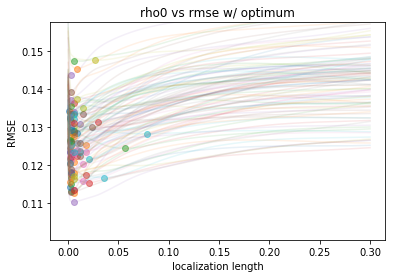

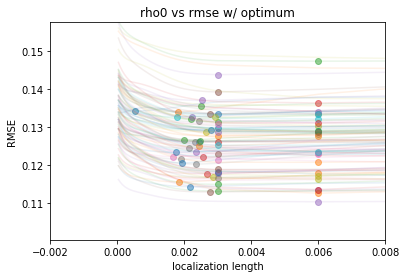

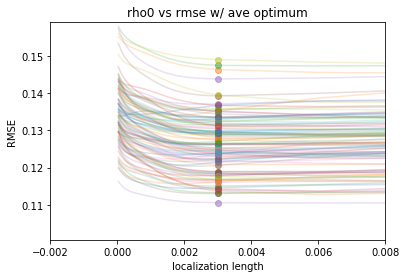

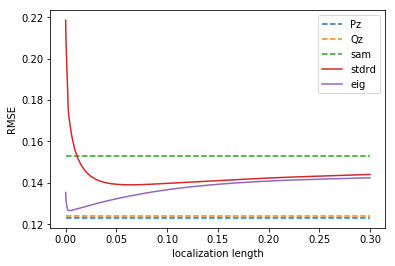

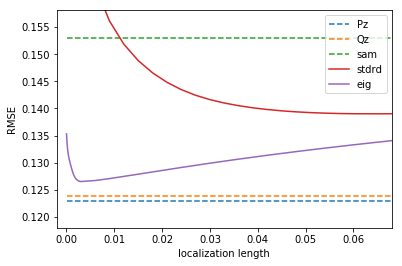

In [14]:
ymax = 0
ymin = 1
plt.figure()
for this_rmse in rmse_eig[:, 0, :]:
    this_arg_min = np.argmin(this_rmse)
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.1)
    plt.scatter(rho0_array[0, 0, this_arg_min],
                this_rmse[this_arg_min],
                alpha=0.5)
    ymin = np.min([ymin, this_rmse[this_arg_min]])
    ymax = np.max([ymax, this_rmse[this_arg_min]])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([ymin - 0.01, ymax + 0.01])
plt.title('rho0 vs rmse w/ optimum')

ymin = 1
plt.figure()
for this_rmse in rmse_eig[:, 0, :]:
    this_arg_min = np.argmin(this_rmse)
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.1)
    plt.scatter(rho0_array[0, 0, this_arg_min],
                this_rmse[this_arg_min],
                alpha=0.5)
    ymin = np.min([ymin, this_rmse[this_arg_min]])
    ymax = np.max([ymax, this_rmse[this_arg_min]])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([ymin - 0.01, ymax + 0.01])
plt.title('rho0 vs rmse w/ optimum')
plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
          rho0_array[0, 0, min_index_eig[1]] + .005])

ymax = 0
ymin = 1
plt.figure()
for this_rmse in rmse_eig[:, 0, :]:
    plt.plot(rho0_array[0, 0, :], this_rmse, alpha=0.2)
    plt.scatter(rho0_array[0, 0, min_index_eig[1]],
                this_rmse[min_index_eig[1]],
                alpha=0.5)
    ymin = np.min([ymin, this_rmse[min_index_eig[1]]])
    ymax = np.max([ymax, this_rmse[min_index_eig[1]]])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([ymin - 0.01, ymax + 0.01])
plt.title('rho0 vs rmse w/ ave optimum')
plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
          rho0_array[0, 0, min_index_eig[1]] + .005])

one_array = np.ones(rho0_array[0, 0, :].size)
plt.figure()
plt.plot(rho0_array[0, 0, :], one_array * rmse_Pz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_Qz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_sam.mean(), '--')
plt.plot(rho0_array[0, 0, :], rmse_stdrd[:, min_index[0], :].mean(axis=0))
plt.plot(rho0_array[0, 0, :], rmse_eig[:, min_index[0], :].mean(axis=0))
plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig'])
plt.xlabel('localization length')
plt.ylabel('RMSE')

one_array = np.ones(rho0_array[0, 0, :].size)
plt.figure()
plt.plot(rho0_array[0, 0, :], one_array * rmse_Pz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_Qz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_sam.mean(), '--')
plt.plot(rho0_array[0, 0, :], rmse_stdrd[:, min_index[0], :].mean(axis=0))
plt.plot(rho0_array[0, 0, :], rmse_eig[:, min_index[0], :].mean(axis=0))
plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig'])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([rmse_Pz.mean() - 0.005, rmse_sam.mean() + 0.005])
plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
          rho0_array[0, 0, min_index[1]] + .005])

In [15]:
min_rmse_stdrd = rmse_stdrd.min(axis=1).min(axis=1)
opt_rmse_stdrd = rmse_stdrd[:, min_index[0], min_index[1]]

min_rmse_eig = rmse_eig.min(axis=1).min(axis=1)
opt_rmse_eig = rmse_eig[:,
                        min_index_eig[0],
                        min_index_eig[1]]

Text(0.5, 0, 'trial number')

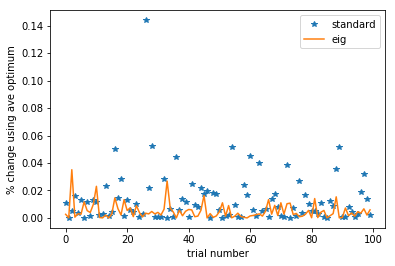

In [16]:
plt.figure()
plt.plot((opt_rmse_stdrd
         - min_rmse_stdrd)/opt_rmse_stdrd,
         marker='*', linestyle='None')
plt.plot((opt_rmse_eig
         - min_rmse_eig)/opt_rmse_eig)
plt.legend(['standard','eig'])
plt.ylabel('% change using ave optimum')
plt.xlabel('trial number')

In [17]:
ratio_smooth = rmse_smooth/std_smooth
ave_rmse_smooth = np.sqrt((rmse_smooth**2).mean(axis=0))
ave_std_smooth = np.sqrt((std_smooth**2).mean(axis=0))
ave_ratio_smooth = np.sqrt((ratio_smooth**2).mean(axis=0))

min_index_smooth = np.unravel_index(np.argmin(ave_rmse_smooth), (ave_rmse_smooth.shape))
print('optimal values for smooth localization')
print('rmse: ', ave_rmse_smooth[min_index_smooth])
print('smooth sigma: ', smooth_array[0][min_index_smooth])

optimal values for smooth localization
rmse:  0.1268743264358384
smooth sigma:  41.0


(-0.002, 0.068)

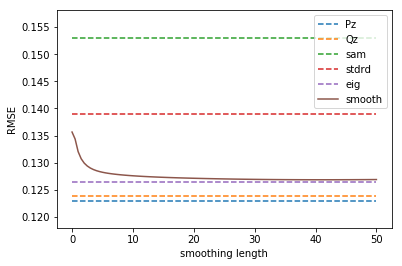

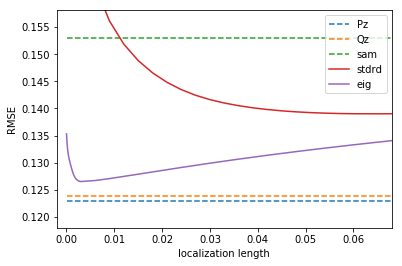

In [18]:
one_array = np.ones_like(smooth_array[0])
plt.figure()
plt.plot(smooth_array[0], one_array * rmse_Pz.mean(), '--')
plt.plot(smooth_array[0], one_array * rmse_Qz.mean(), '--')
plt.plot(smooth_array[0], one_array * rmse_sam.mean(), '--')
plt.plot(smooth_array[0],
         one_array
         * rmse_stdrd[:, min_index[0], :].mean(axis=0).min(), 
         '--')
plt.plot(smooth_array[0],
         one_array
         * rmse_eig[:, min_index[0], :].mean(axis=0).min(),
         '--')
plt.plot(smooth_array[0], ave_rmse_smooth)
plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig', 'smooth'])
plt.xlabel('smoothing length')
plt.ylabel('RMSE')
plt.ylim([rmse_Pz.mean() - 0.005, rmse_sam.mean() + 0.005])


# plt.figure()
# plt.plot(smooth_array[0], one_array * rmse_Pz.mean(), '--')
# plt.plot(smooth_array[0], one_array * rmse_Qz.mean(), '--')
# plt.plot(smooth_array[0], one_array * rmse_sam.mean(), '--')
# plt.plot(smooth_array[0], rmse_stdrd[:, min_index[0], :].mean(axis=0))
# plt.plot(smooth_array[0], rmse_eig[:, min_index[0], :].mean(axis=0))
# plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig'])
# plt.xlabel('localization length')
# plt.ylabel('RMSE')
# plt.ylim([rmse_Pz.mean() - 0.005, rmse_sam.mean() + 0.005])
# plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
#           rho0_array[0, 0, min_index[1]] + .005])

# one_array = np.ones(rho0_array[0, 0, :].size)
# plt.figure()
# plt.plot(rho0_array[0, 0, :], one_array * rmse_Pz.mean(), '--')
# plt.plot(rho0_array[0, 0, :], one_array * rmse_Qz.mean(), '--')
# plt.plot(rho0_array[0, 0, :], one_array * rmse_sam.mean(), '--')
# plt.plot(rho0_array[0, 0, :], rmse_stdrd[:, min_index[0], :].mean(axis=0))
# plt.plot(rho0_array[0, 0, :], rmse_eig[:, min_index[0], :].mean(axis=0))
# plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig'])
# plt.xlabel('localization length')
# plt.ylabel('RMSE')

one_array = np.ones(rho0_array[0, 0, :].size)
plt.figure()
plt.plot(rho0_array[0, 0, :], one_array * rmse_Pz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_Qz.mean(), '--')
plt.plot(rho0_array[0, 0, :], one_array * rmse_sam.mean(), '--')
plt.plot(rho0_array[0, 0, :], rmse_stdrd[:, min_index[0], :].mean(axis=0))
plt.plot(rho0_array[0, 0, :], rmse_eig[:, min_index[0], :].mean(axis=0))
plt.legend(['Pz', 'Qz', 'sam', 'stdrd', 'eig'])
plt.xlabel('localization length')
plt.ylabel('RMSE')
plt.ylim([rmse_Pz.mean() - 0.005, rmse_sam.mean() + 0.005])
plt.xlim([rho0_array[0, 0, min_index_eig[1]] - .005,
          rho0_array[0, 0, min_index[1]] + .005])